# Dog Breed Prediction
## https://www.kaggle.com/c/dog-breed-identification/overview
### CS 4662
### Spring 2020
### Alan Garcia
### Ryan Peralta


Before running the project, pillow must be installed in anaconda.


You can use this command in the anaconda terminal:


#### conda install pillow


### Imports need to run our code for the Dog Breed project

In [1]:
import PIL.Image
from numpy import asarray
from PIL import Image

#import plaidml.keras
#plaidml.keras.install_backend()

#from tensorflow.keras import backend
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.image as mpimg

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

Using TensorFlow backend.


### The next cell is needed to resize the images to standard and more usable size. It only needs to be run one time at the start of running this project, then it can be commented out for future test runs.

In [39]:
'''
import os
counter = 0
d = "C:/Users/rpera/Desktop/Spring 2020/CS 4662/Project Data/train"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        print(full_path)
        img = Image.open(full_path).convert('L')
        maxsize = (128, 128)
        img = img.resize(maxsize, PIL.Image.ANTIALIAS)
        img.save('resized_photos/'+ str(counter) + '.jpg')
        counter += 1

'''

'\nimport os\ncounter = 0\nd = "C:/Users/rpera/Desktop/Spring 2020/CS 4662/Project Data/train"\nfor path in os.listdir(d):\n    full_path = os.path.join(d, path)\n    if os.path.isfile(full_path):\n        print(full_path)\n        img = Image.open(full_path).convert(\'L\')\n        maxsize = (128, 128)\n        img = img.resize(maxsize, PIL.Image.ANTIALIAS)\n        img.save(\'resized_photos/\'+ str(counter) + \'.jpg\')\n        counter += 1\n\n'

In [8]:
listForX = []
for x in range(0, 10222):
    test = mpimg.imread("C:/Users/rpera/Desktop/Spring 2020/CS 4662/CS4662-Project/resized_photos/"+str(x)+".jpg")
    # test = mpimg.imread("/Users/Alan/Desktop/Data_Science_2/final project/resized_photos/"+str(x)+".jpg")
    testing = (test.reshape(1, 16384))
    listForX.append(testing[0])

### Convert our existing datafram into X by converting the values from a list into an array through numpy

In [5]:
df = pd.DataFrame(listForX)
df.values.tolist()
X = np.asarray(listForX)

### Read the labels.csv into y

In [24]:
y = pd.read_csv("C:/Users/rpera/Desktop/Spring 2020/CS 4662/Project Data/labels.csv")
#y = pd.read_csv("/Users/Alan/Desktop/Data_Science_2/final project/labels.csv")

In [25]:
y.head

<bound method NDFrame.head of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>

### Dropping the id column from y so that it only contains a vector of labels

In [26]:
y = y.drop(['id'], axis=1)
y['breed'] = pd.factorize(y['breed'])[0]
y = y.breed.tolist()

### Split X and y into train and test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

In [29]:
y_train = np_utils.to_categorical(y_train, 120)
y_test = np_utils.to_categorical(y_test, 120)

### Shaping X

In [30]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape

(8177, 128, 128, 1)

### Creating our sequential model

In [31]:
model = Sequential()
model.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(128,128,1)))
print(model.output_shape) # -> (None, 26, 26, 32)

(None, 126, 126, 64)


### Adding the layers to our model

In [32]:
# more hidden layers:
model.add(Convolution2D(64, (3, 3), activation='relu'))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

(None, 124, 124, 64)
(None, 62, 62, 64)


In [33]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
print(model.output_shape)

(None, 246016)
(None, 128)
(None, 120)


In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

In [35]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               31490176  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

### Shaping X and y

In [36]:
X_train.shape
y_train.shape

(8177, 120)

In [37]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  min_delta=0.01, patience=3)
fitted_model = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=15, verbose=1)

Epoch 1/30
8177/8177 [==============================] - 36s 4ms/step - loss: 4.8309 - acc: 0.0087
Epoch 2/30
8177/8177 [==============================] - 26s 3ms/step - loss: 4.7657 - acc: 0.0136
Epoch 3/30
8177/8177 [==============================] - 26s 3ms/step - loss: 4.5769 - acc: 0.0380
Epoch 4/30
8177/8177 [==============================] - 26s 3ms/step - loss: 4.0259 - acc: 0.1131
Epoch 5/30
8177/8177 [==============================] - 26s 3ms/step - loss: 3.0297 - acc: 0.2859
Epoch 6/30
8177/8177 [==============================] - 26s 3ms/step - loss: 2.1474 - acc: 0.4655
Epoch 7/30
8177/8177 [==============================] - 26s 3ms/step - loss: 1.5503 - acc: 0.6034
Epoch 8/30
8177/8177 [==============================] - 26s 3ms/step - loss: 1.1851 - acc: 0.6881
Epoch 9/30
8177/8177 [==============================] - 26s 3ms/step - loss: 0.9573 - acc: 0.7491
Epoch 10/30
8177/8177 [==============================] - 26s 3ms/step - loss: 0.7867 - acc: 0.7889
Epoch 11/30
8177/81

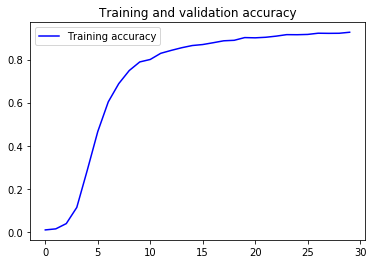

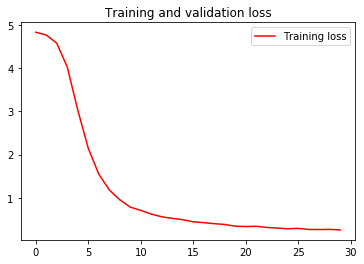

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = fitted_model.history['acc']
#val_accuracy = history.history['val_acc']
loss = fitted_model.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

### Predicting based off of our model

In [39]:
y_predict = model.predict(X_test, verbose=1)
print (y_predict.shape)

2045/2045 [==============================] - 4s 2ms/step
(2045, 120)


In [40]:
y_predict

array([[5.50078286e-04, 3.82350943e-14, 1.17806941e-15, ...,
        1.35504985e-14, 1.24917620e-11, 2.47266189e-06],
       [1.96667406e-05, 1.39031513e-07, 5.57492208e-03, ...,
        2.05758305e-12, 1.81454252e-02, 3.25244409e-09],
       [1.12887681e-03, 9.17732086e-06, 1.96067731e-06, ...,
        6.37579035e-07, 4.40506556e-04, 9.03131368e-05],
       ...,
       [4.06334829e-03, 9.10756364e-02, 1.16707878e-02, ...,
        8.85233690e-04, 1.90296806e-02, 8.99407919e-03],
       [5.48385037e-03, 7.46073852e-07, 1.91487325e-05, ...,
        6.51300454e-08, 4.40662086e-04, 1.18042481e-05],
       [3.52236023e-03, 3.68800364e-04, 7.05190077e-02, ...,
        3.52088216e-04, 4.78134537e-03, 4.47198508e-05]], dtype=float32)

In [41]:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

2045/2045 [==============================] - 5s 2ms/step
The accuracy is:  0.02542787285699238


## We obtained an accuracy of 2.5%. This might be because we overfit our model.